In [1]:
%matplotlib inline

import contextily as cx
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show as rioshow
import matplotlib.pyplot as plt

In [2]:
data_url = "https://ndownloader.figshare.com/files/20232174"
db = gpd.read_file(data_url)

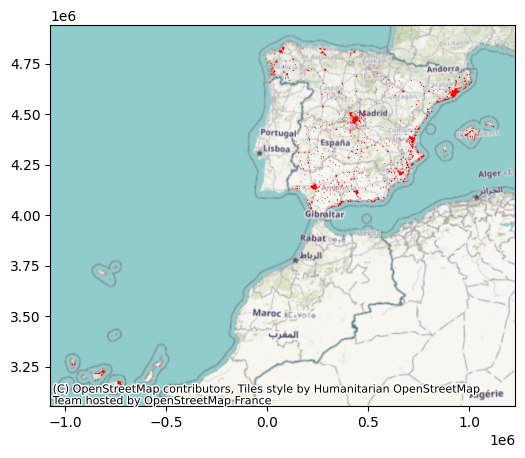

In [3]:
#Plotting using WMS map
ax = db.plot(color="red", figsize=(6, 6))
cx.add_basemap(ax, crs=db.crs)

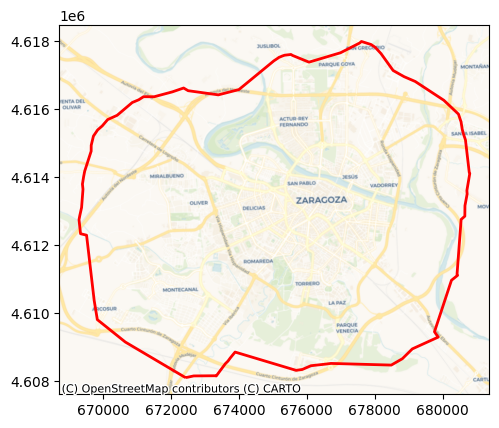

In [4]:
zaragoza = db.query("city_id == 'ci122'")
ax = zaragoza.plot(facecolor="none",
                   edgecolor="red",
                   linewidth=2
                  )
cx.add_basemap(ax,
               crs=zaragoza.crs.to_string(),
               source=cx.providers.CartoDB.Voyager
              )

<div style='background:#B1F9E3; color:#000000' class='alert alert-box'>
  <h1>Coordinate-based Searches</h1>
  <p>Additional shapes are not required to access tiles. As long as you have a bounding box of coordinates, you can access tiles. This bounding box needs to be expressed either in Web (Spherical) Mercator or in longitude and latitude (WGS84).</p>
</div>


In [5]:
west, south, east, north = (
    3.616218566894531,
    50.98912458110244,
    3.8483047485351562,
    51.13994019806845
             )

In [6]:
ghent_img, ghent_ext = cx.bounds2img(west,
                                     south,
                                     east,
                                     north,
                                     ll=True,
                                     source=cx.providers.CartoDB.Voyager
                                    )

In [7]:
ghent_img.shape

(1024, 768, 4)

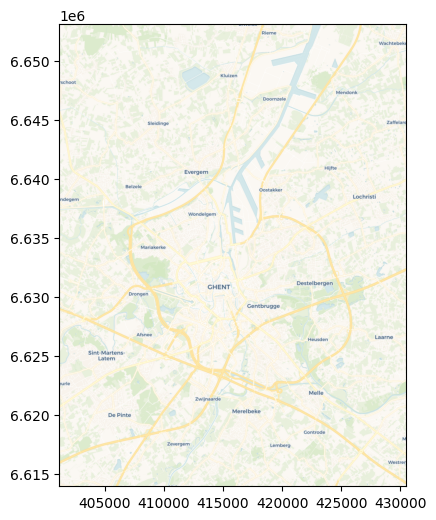

In [8]:
f, ax = plt.subplots(1, figsize=(6, 6))
ax.imshow(ghent_img, extent=ghent_ext)

<div style='background:#B1F9E3; color:#000000' class='alert alert-box'>
  <h1>Places</h1>
  <p>You can also access tiles of places with a text-based search, and <code>contextily</code> will do its best to find you a solution (this functionality is thanks to <a href="https://geopy.readthedocs.io/en/stable/" target="_blank">geopy</a>, an amazing geocoding package, working under the hood).</p>
</div>


<Axes: title={'center': 'India'}, xlabel='X', ylabel='Y'>

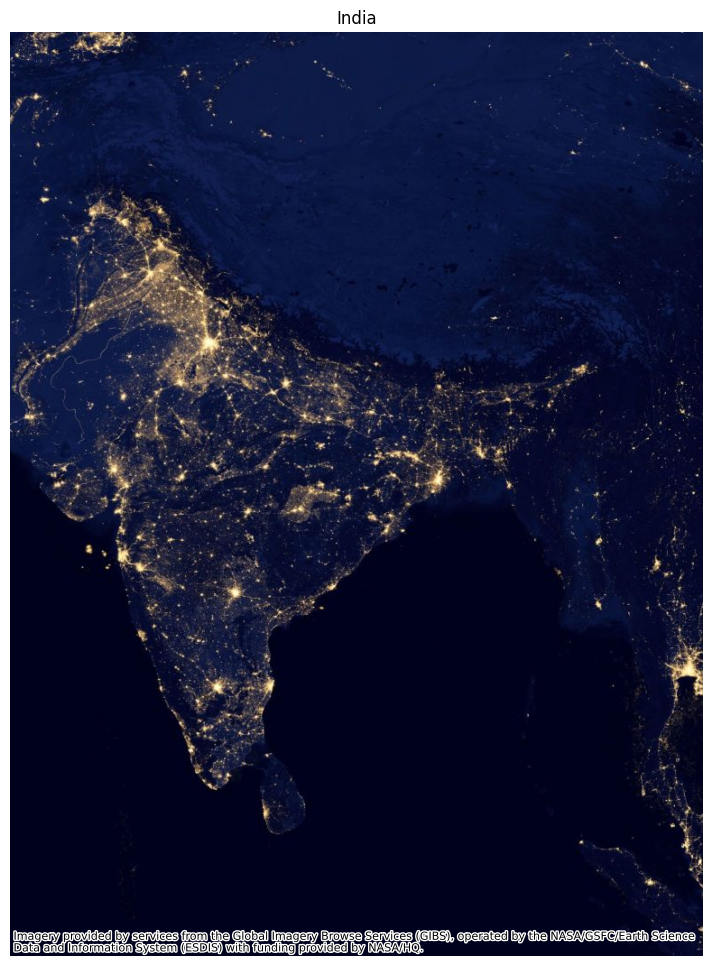

In [9]:
nightlights = cx.providers.NASAGIBS.ViirsEarthAtNight2012
ireland = cx.Place("India", source=nightlights)
ireland.plot()

<div style='background:#B1F9E3; color:#000000' class='alert alert-box'>
  <h1>Store Basemaps Locally</h1>
  <p>When you are working interactively, it is common to iterate over one visualization several times and to have to combine several tools, not necessarily always Python. In these two situations, it is very handy if you don’t have to re-download a basemap every new iteration. <code>contextily</code> helps you with both.</p>
  <p>First, in a given session, each tile is only downloaded once. Tiles are stored in a temporary cache, so the next time you need it, you don’t have to go to the web. This results in significant time savings and reduced network footprint.</p>
</div>



In [10]:
%time kar = cx.Place("Karnataka, India")

CPU times: total: 0 ns
Wall time: 4.74 s


<Axes: title={'center': 'Karnataka, India'}, xlabel='X', ylabel='Y'>

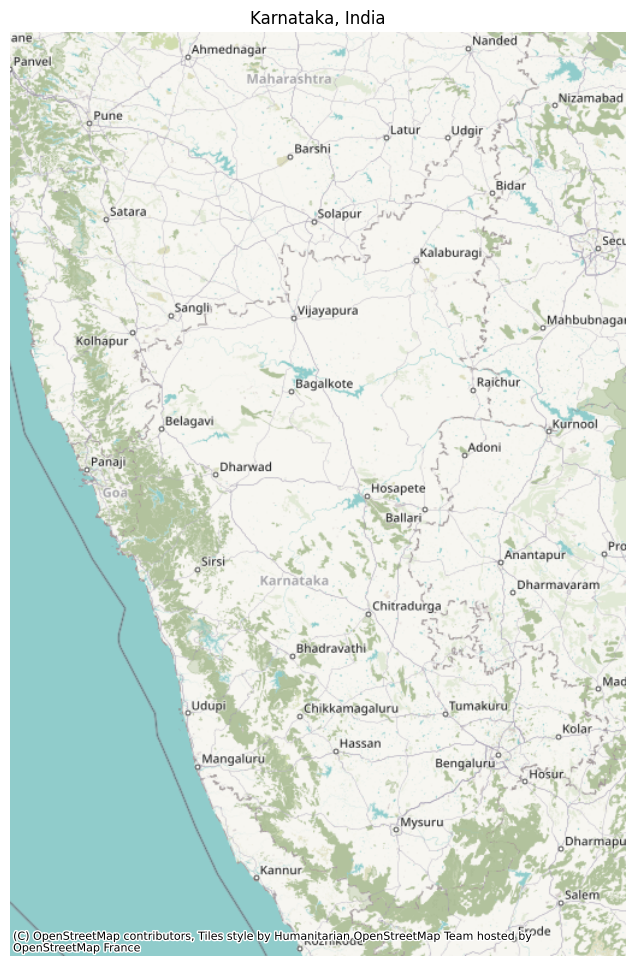

In [11]:
kar.plot()

<div style='background:#B1F9E3; color:#000000' class='alert alert-box'>
  <h1>Second, Contextily</h1>
  <p>Second, <code>contextily</code> lets you download basemaps and store them in standard raster files that you can open back in Python, or in any other GIS. There are several ways to access this functionality. One is through the Places API:</p>
</div>

In [12]:
Mys = cx.Place("Mysore, Karnataka", path="Mys.tif")

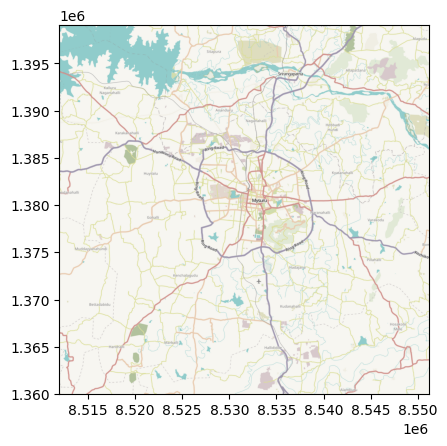

In [13]:
with rio.open("Mys.tif") as r:
    rioshow(r)

<div style='background:#B1F9E3; color:#000000' class='alert alert-box'>
  <p>And you can also pull down basemaps using <code>bounds2img</code>’s sister method, <code>bounds2raster</code>, which works similarly.</p>
</div>


In [14]:
w, s, e, n = (76.0816650390625,
              12.268087670237485,
             76.7582550048828125,
              12.486002749115556)
_ = cx.bounds2raster(w, s, e, n,
                     ll=True,
                     path="Cauvery.tif",
                     source=cx.providers.CartoDB.Positron
                    )

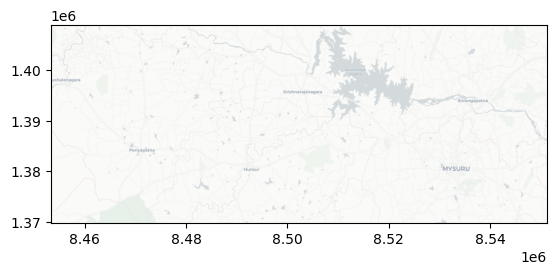

In [15]:
with rio.open("Cauvery.tif") as r:
    rioshow(r)

<div style='background:#B1F9E3; color:#000000' class='alert alert-box'>
  <h1>Fine-Tune Zoom Levels</h1>
  <p>Tile-based basemaps are provided at different zoom levels. Usually, <code>contextily</code> will automatically figure out an appropriate level so you don’t have to think about it. But sometimes, a user might want to fiddle with zoom levels on their own. For these tasks, the <code>zoom</code> parameter will be your friend.</p>
  <p>For example, let’s return to the Ghent map:</p>
</div>


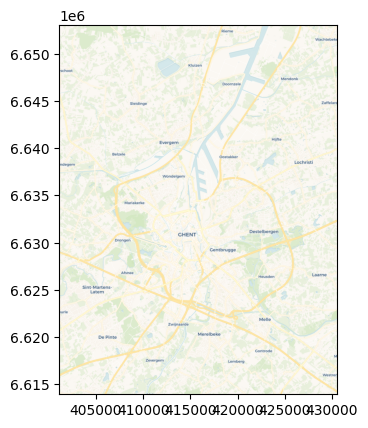

In [16]:
plt.imshow(ghent_img, extent=ghent_ext)

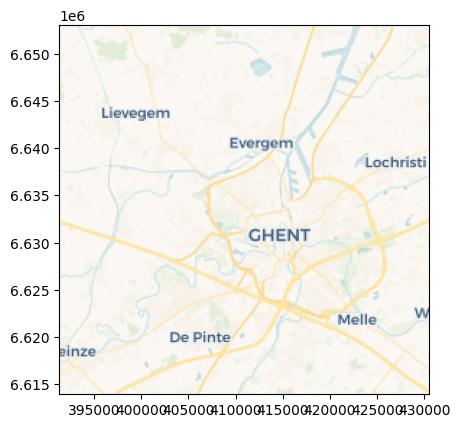

In [17]:
ghent_img, ghent_ext = cx.bounds2img(west,
                                     south,
                                     east,
                                     north,
                                     ll=True,
                                     source=cx.providers.CartoDB.Voyager,
                                     zoom=10,
                                    )
plt.imshow(ghent_img, extent=ghent_ext)

<div style='background:#B1F9E3; color:#000000' class='alert alert-box'>
  <h1>Using Transparent Layers</h1>
  <p>Sometimes, when you plot data on a basemap, the data will obscure some important map elements, such as labels, that you would otherwise want to see unobscured.</p>
</div>


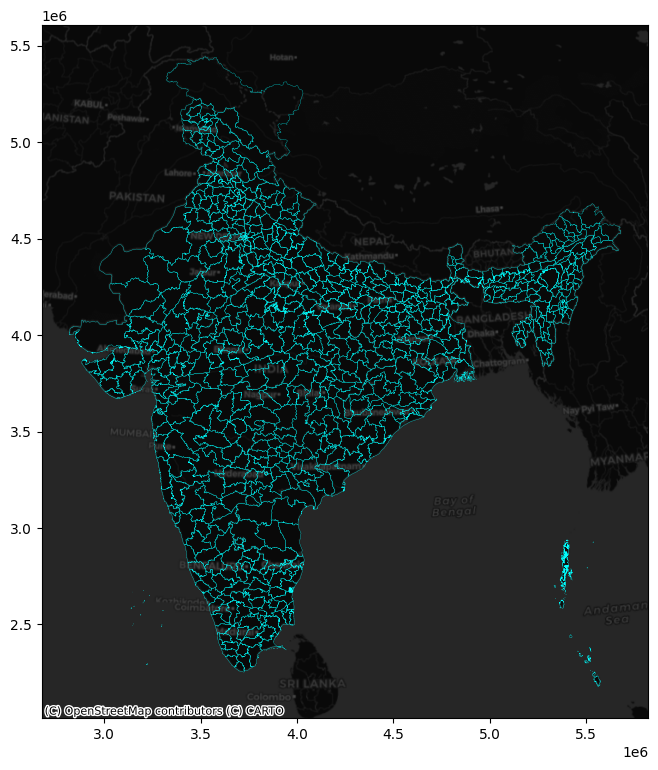

In [18]:
df = gpd.read_file("DIST/IND_dist.shp")
ax = df.plot(figsize=(9,9), color="none", edgecolor="cyan", linewidth=0.2)
cx.add_basemap(ax, crs=df.crs.to_string(), source=cx.providers.CartoDB.DarkMatter)

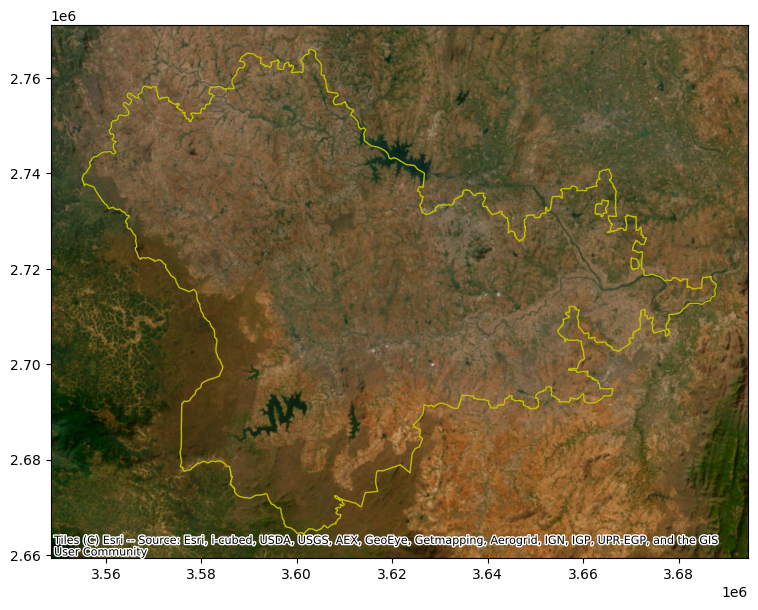

In [19]:
gdf = df[df['District'] == 'MYS@RU']
ax = gdf.plot(figsize=(9,9), color="none", edgecolor="y", linewidth=1)
cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.Esri.WorldImagery)

<div style='background:#B1F9E3; color:#000000' class='alert alert-box'>
  <p>Some map tile providers offer multiple sets of partially transparent tiles to solve this, and <code>contextily</code> will do its best to auto-detect these transparent layers and put them on top.</p>
</div>


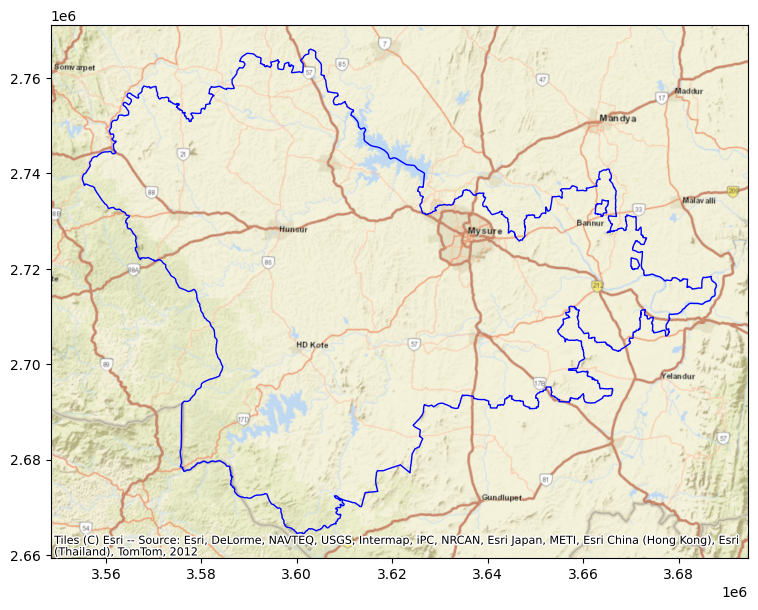

In [20]:
gdf = df[df['District'] == 'MYS@RU']
ax = gdf.plot(figsize=(9,9), color="none", edgecolor="b", linewidth=1)
cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.Esri.WorldStreetMap)

<div style='background:#B1F9E3; color:#000000' class='alert alert-box'>
  <p>For more information, refer to the <a href="https://contextily.readthedocs.io/en/latest/intro_guide.html" target="_blank">Contextily documentation</a>.</p>
</div>
